## Mounting your google drive

You can use google drive to store and access files e.g. storing and loading data from numpy or CSV files.  
Use the following command to mount your GDrive and access your files.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install ffmpeg
!pip install vtk

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=eb68824f300bf80ec985885970ed6039f1aa4ff05e4c385c35a46bba15bf1a53
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
     |████████████████████████████████| 59.5 MB 40 kB/s 
     |████████████████████████████████| 3.1 MB 61.4 MB/s 
     |████████████████████████████████| 495 kB 55.3 MB/s 
     |████████████████████████████████| 74 kB 3.4 MB/s 
     |████████████████████████████████| 3.2 MB 57.2 MB/s 
     |████████████████████████████████| 251 kB 50.4 MB/s 
     |████████████████████████████████| 1.3 MB 57.8 MB/s 
     |████████████████████████████████| 142 kB 60.6 MB/s 
     |████████████████████████████████| 294 kB 62.8 MB/s 


In [ ]:
import os
# change the current path. The user can adjust the path depend on the requirement
os.chdir("/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF")
import vtktools

In [ ]:
! /opt/bin/nvidia-smi

Sun Aug 22 08:54:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !unzip csv_data.zip 

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import numpy.linalg as la
import scipy.linalg as sl
import scipy.sparse.linalg as spl
import matplotlib.pyplot as plt
import torch.nn as nn  # Neural network module
import scipy.sparse as sp
import scipy.optimize as sop
import progressbar
# making slopes
import torch
from torch.utils.data import TensorDataset
import torch.nn.functional as F
from matplotlib.pyplot import LinearLocator
import matplotlib as mpl
import matplotlib.colors as colors


# create an animation
from matplotlib import animation
from IPython.display import HTML

from matplotlib import animation
import math
import ffmpeg

!pip install pycm livelossplot
%pylab inline
from livelossplot import PlotLosses

from torch.utils.data import DataLoader
import torch.utils.data as Data

import time
import platform
print('python version', platform.python_version())
print('torch version', torch.__version__)
print('numpy version', np.version.version)

     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 571 kB 13.1 MB/s 
Populating the interactive namespace from numpy and matplotlib
python version 3.7.11
torch version 1.9.0+cu102
numpy version 1.19.5


In [ ]:
def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = True  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = True

    return True

device = 'cuda'  # Set out device to GPU

print('Cuda installed, running on GPU!')  # print sentence

Cuda installed, running on GPU!


# SFC-CAE

In [ ]:
# These functions are saved in function.py and the note are also added to that file
def saveIndex(path_train, path_valid, path_test,train_index, valid_index, test_index):
    # save training and validation loss    
    np.savetxt(path_train,train_index, delimiter=',')
    np.savetxt(path_valid,valid_index, delimiter=',')
    np.savetxt(path_test,test_index, delimiter=',')

def getIndex(path_train,path_valid,path_test):
    train_index = np.loadtxt(path_train,delimiter=",")
    valid_index = np.loadtxt(path_valid,delimiter=",")
    test_index = np.loadtxt(path_test,delimiter=",")
    return train_index,valid_index,test_index

def saveMode(path_train, path_valid, path_test,mode_train, mode_valid, mode_test):
    # save training and validation loss    
    np.savetxt(path_train,mode_train.cpu().data.numpy(), delimiter=',')
    np.savetxt(path_valid,mode_valid.cpu().data.numpy(), delimiter=',')
    np.savetxt(path_test,mode_test.cpu().data.numpy(), delimiter=',')

def getMode(path_train,path_valid,path_test):
    mode_train = np.loadtxt(path_train,delimiter=",")
    mode_valid = np.loadtxt(path_valid,delimiter=",")
    mode_test = np.loadtxt(path_test,delimiter=",")
    return mode_train,mode_valid,mode_test

def saveCsv(pathcsv,EPOCH):
    # save training and validation loss
    losses_combined = np.zeros((EPOCH,3))
    losses_combined[:,0] = np.asarray(epoch_list)
    losses_combined[:,1] = np.asarray(loss_list)
    losses_combined[:,2] = np.asarray(loss_valid)
    np.savetxt(pathcsv, losses_combined , delimiter=',')

def PlotMSELoss(pathName,name):
    epoch = pd.read_csv(pathName,usecols=[0]).values
    train_loss = pd.read_csv(pathName,usecols=[1]).values
    val_loss = pd.read_csv(pathName,usecols=[2]).values

    fig = plt.figure(figsize=(10,7))
    axe1 = plt.subplot(111)
    axe1.semilogy(epoch,train_loss,label = "train")
    axe1.plot(epoch,val_loss,label = "valid")
    axe1.legend(loc = "best",fontsize=14)
    axe1.set_xlabel("$epoch$",fontsize=14)
    axe1.set_ylabel("$MSE loss$",fontsize=14)
    axe1.set_title(name,fontsize=14)

def getTotal_decoded(training_decoded,valid_decoded,test_decoded,train_index,valid_index,test_index):
    total_decoded = np.zeros((nTotal,nNodes,2))
    for i in range(len(train_index)):
        total_decoded[int(train_index[i]),:,0] = training_decoded.cpu().detach().numpy()[i,:,0]
        total_decoded[int(train_index[i]),:,1] = training_decoded.cpu().detach().numpy()[i,:,1]

    for i in range(len(valid_index)):
        total_decoded[int(valid_index[i]),:,0] = valid_decoded.cpu().detach().numpy()[i,:,0]
        total_decoded[int(valid_index[i]),:,1] = valid_decoded.cpu().detach().numpy()[i,:,1]

    for i in range(len(test_index)):
        total_decoded[int(test_index[i]),:,0] = test_decoded.cpu().detach().numpy()[i,:,0]
        total_decoded[int(test_index[i]),:,1] = test_decoded.cpu().detach().numpy()[i,:,1]
    return total_decoded

def getMSELoss(pathName):
    epoch = pd.read_csv(pathName,usecols=[0]).values
    train_loss = pd.read_csv(pathName,usecols=[1]).values
    val_loss = pd.read_csv(pathName,usecols=[2]).values
    return train_loss,val_loss,epoch

def index_split(train_ratio, valid_ratio, test_ratio, total_num):
    if train_ratio + valid_ratio + test_ratio != 1:
        raise ValueError("Three input ratio should sum to be 1!")
    total_index = np.arange(total_num)
    rng = np.random.default_rng()
    total_index = rng.permutation(total_index)
    knot_1 = int(total_num * train_ratio)
    knot_2 = int(total_num * valid_ratio) + knot_1
    train_index, valid_index, test_index = np.split(total_index, [knot_1, knot_2])
    return train_index, valid_index, test_index

In [ ]:
path_train = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_train_index.csv"
path_valid = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_valid_index.csv"
path_test = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_test_index.csv"
# saveIndex(path_train, path_valid, path_test,train_index, valid_index, test_index)

In [ ]:
# Load the train_index, valid_index and test_index
train_index,valid_index,test_index= getIndex(path_train,path_valid,path_test)
print(test_index)

[ 133.  490. 1480.  730.  481. 1382.  440.  750. 1502. 1451.  692. 1094.
 1679.  510. 1241. 1101.  543. 1312. 1432. 1988. 1148. 1801. 1519.  367.
 1858. 1043. 1175. 1218. 1479.  103. 1363.  800.  258. 1851.  267.  999.
  611. 1824.  318.  753. 1413.  727. 1273. 1358. 1090.  838.  250. 1763.
 1038.  439. 1199.  334. 1848. 1924. 1013.  271.  936.  600. 1553.  423.
 1467. 1658.  929. 1748.  783.  329.  303. 1067.  868.  374. 1102. 1843.
  683.  449.  855. 1142. 1393.  194. 1112.  636. 1617. 1910. 1722.  536.
 1149. 1765.  468. 1922. 1703. 1311.  341.  110. 1258. 1257. 1711.   93.
 1969.  396. 1259.  199.  962. 1704.  462. 1407.  634.  535. 1505.  537.
  612. 1707. 1565. 1963. 1955.    3. 1058. 1946.  372. 1653. 1077.  414.
  469.  680. 1430.  649.  215.  234. 1692.  653. 1455.  582. 1169. 1138.
  411.  518.  865. 1977. 1688.  822.  397. 1388. 1221.  239.  249. 1781.
 1751.  915.  278. 1970.  907.  477. 1552.  703.  870.  916. 1650.  561.
 1401.  129. 1123. 1804. 1871. 1527.  308.   94. 19

## load data

In [ ]:
os.chdir('/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF')
print(os.getcwd())

# read in the data (1000 csv files)
nTrain = 1600
nValid = 200
nTest = 200
nTotal = nTrain + nValid + nTest
nNodes = 20550 # should really work this out


# The below method to load data is too slow. Therefore, we use load pt file

# [:, :, 2] is speed, [:, :, 3] is u, [:, :, 4] is v
# (speed not really needed)
# [:, :, 0] and [:, :, 1] are the SFC orderings

# training_data = np.zeros((nTrain,nNodes,5))
# for i in range(nTrain):
#     data = np.loadtxt('csv_data/data_' +str(int(train_index[i]))+ '.csv', delimiter=',')
#     training_data[i,:,:] = data
# training_data = np.array(training_data)
# print('size training data', training_data.shape)

# valid_data = np.zeros((nValid,nNodes,5))
# for i in range(nValid):
#     data = np.loadtxt('csv_data/data_' +str(int(valid_index[i]))+ '.csv', delimiter=',')
#     valid_data[i,:,:] = data
# valid_data = np.array(valid_data)
# print('size validation data', valid_data.shape)

# test_data = np.zeros((nTest,nNodes,5))
# for i in range(nTest):
#     data = np.loadtxt('csv_data/data_' +str(int(test_index[i]))+ '.csv', delimiter=',')
#     test_data[i,:,:] = data
# test_data = np.array(test_data)
# print('size test data', test_data.shape)

# total_data = np.zeros((nTotal,nNodes,5))
# for i in range(len(train_index)):
#     total_data[int(train_index[i]),:,:] = training_data[i,:,:]

# for i in range(len(valid_index)):
#     total_data[int(valid_index[i]),:,:] = valid_data[i,:,:]

# for i in range(len(test_index)):
#     total_data[int(test_index[i]),:,:] = test_data[i,:,:]
# print('size total data', total_data.shape)



/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF


In [ ]:
# Before we save the pt file, we must load the data according to the above method
# torch.save(training_data, '/content/gdrive/MyDrive/FPC_new_random_train.pt')
# torch.save(valid_data, '/content/gdrive/MyDrive/FPC_new_random_valid.pt')
# torch.save(test_data, '/content/gdrive/MyDrive/FPC_new_random_test.pt')
# torch.save(total_data, '/content/gdrive/MyDrive/FPC_new_random_total.pt')


In [ ]:
# load the data, this method save the time
training_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_train.pt')
valid_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_valid.pt')
test_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_test.pt')
total_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_total.pt')
print(training_data.shape)
print(valid_data.shape)
print(test_data.shape)
print(total_data.shape)

(1600, 20550, 5)
(200, 20550, 5)
(200, 20550, 5)
(2000, 20550, 5)


In [ ]:
# rescale the data so that u and v data lies in the range [-1,1] (and speed in [0,1])
ma = np.max(training_data[:, :, 2])
mi = np.min(training_data[:, :, 2])
k = 1./(ma - mi)
b = 1 - k*ma #k*mi
training_data[:, :, 2] = k * training_data[:, :, 2] + b #- b
# this won't be used

ma = np.max(training_data[:, :, 3])
mi = np.min(training_data[:, :, 3])
ku = 2./(ma - mi)
bu = 1 - ku*ma 
training_data[:, :, 3] = ku * training_data[:, :, 3] + bu
valid_data[:, :, 3] = ku * valid_data[:, :, 3] + bu
test_data[:, :, 3] = ku * test_data[:, :, 3] + bu
total_data[:, :, 3] = ku * total_data[:, :, 3] + bu

ma = np.max(training_data[:, :, 4])
mi = np.min(training_data[:, :, 4])
kv = 2./(ma - mi)
bv = 1 - kv*ma
training_data[:, :, 4] = kv * training_data[:, :, 4] + bv
valid_data[:, :, 4] = kv * valid_data[:, :, 4] + bv
test_data[:, :, 4] = kv * test_data[:, :, 4] + bv
total_data[:, :, 4] = kv * total_data[:, :, 4] + bv

## Network architetcure

In [ ]:
# SFC-CAE: two curves with nearest neighbour smoothing and compressing to 256 latent variables
print("compress to 256")
Latent_num = 256
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 2001
BATCH_SIZE = 16
LR = 0.0001
k = nNodes # number of nodes - this has to match training_data.shape[0]
print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = training_data, batch_size = BATCH_SIZE, shuffle = True)

compress to 256
(1600, 20550, 5)


In [ ]:
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.encoder_h1 = nn.Sequential(         
            nn.Tanh(),
            nn.Conv1d(4, 4, 16, 4, 9),         # output shape  (16, 4, 5139)
            nn.Tanh(),                  # activation
            nn.Conv1d(4, 4, 16, 4, 9),         # output shape  (16, 4, 1286)
            nn.Tanh(),                   # activation
            nn.Conv1d(4, 8, 16, 4, 9),         # output shape  (16, 8, 323)
            nn.Tanh(),                    # activation
            nn.Conv1d(8, 8, 16, 4, 9),         # output shape  (16, 8, 82)
            nn.Tanh(),                    # activation
        )

        self.encoder_h2 = nn.Sequential(        
            nn.Tanh(),
            nn.Conv1d(4, 4, 16, 4, 9),        # output shape  (16, 4, 5139)
            nn.Tanh(),                  # activation
            nn.Conv1d(4, 4, 16, 4, 9),        # output shape  (16, 4, 1286)
            nn.Tanh(),                  
            nn.Conv1d(4, 8, 16, 4, 9),        # output shape  (16, 8, 323)
            nn.Tanh(),                   
            nn.Conv1d(8, 8, 16, 4, 9),        # output shape  (16, 8, 82)
            nn.Tanh(),                   
        )

        self.fc1 = nn.Sequential(           
            nn.Linear(16*82,  256), 
            nn.Tanh(),                    # activation      
        )
        
        self.fc2 = nn.Sequential(           
            nn.Linear(256, 16*82), 
            nn.Tanh(),                    # activation    
        )
        
        self.decoder_h1 = nn.Sequential(     
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 17, 4, 9), # (16, 8, 323)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 4, 16, 4, 9), # (16, 4, 1286)
            nn.Tanh(),
            nn.ConvTranspose1d(4, 4, 17, 4, 9), # (16, 4, 5139)
            nn.Tanh(),
            nn.ConvTranspose1d(4, 4, 16, 4, 9), # (16, 4, 20550) 
            nn.Tanh(),
        )

        self.decoder_h2 = nn.Sequential(     
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 17, 4, 9), # (16, 8, 323)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 4, 16, 4, 9), # (16, 4, 1286)
            nn.Tanh(),
            nn.ConvTranspose1d(4, 4, 17, 4, 9), # (16, 4, 5139)
            nn.Tanh(),
            nn.ConvTranspose1d(4, 4, 16, 4, 9), # (16, 4, 20550) 
            nn.Tanh(),
        )
        
        # input sparse layers, initialize weight as 0.33, bias as 0
        self.weight1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight1_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight1_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias1 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)

        self.weight11 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight11_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight11_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias11 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        
        self.weight2 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight2_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight2_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias2 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)

        self.weight22 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight22_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight22_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias22 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)

        self.weight3 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight3_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight3_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias3 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        self.weight33 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight33_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight33_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias33 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        self.weight4 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight4_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight4_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias4 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        self.weight44 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight44_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight44_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias44 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        # output sparse layers, initialize weight as 0.083, bias as 0
        self.weight_out1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out1_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out1_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out11 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out11_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out11_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out2 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out2_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out2_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out22 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out22_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out22_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out3 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out3_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out3_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out33 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out33_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out33_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out4 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out4_0= torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out4_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out44 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out44_0= torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out44_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.bias_out1 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.bias_out2 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)


    def forward(self, x):
        
        # first curve
        
        ToSFC1 = x[:, :, 0]
        ToSFC1Up = torch.zeros_like(ToSFC1)
        ToSFC1Down = torch.zeros_like(ToSFC1)
        ToSFC1Up[:-1] = ToSFC1[1:]
        ToSFC1Up[-1] = ToSFC1[-1]
        ToSFC1Down[1:]=ToSFC1[:-1]
        ToSFC1Down[0]=ToSFC1[0]
        
        batch_num = ToSFC1.shape[0]
        #print("ToSFC1",ToSFC1.shape) # (16, 20550)
        
        x1 = x[:, :, 3:5]
        
        #print("x1", x1.shape) #  # (16, 20550, 2)

        x1_1d = torch.zeros((batch_num, 4, k)).to(device)
        # first input sparse layer, then transform to SFC order1
        for j in range(batch_num):
            x1_1d[j, 0, :] = x1[j, :, 0][ToSFC1[j].long()] * self.weight1 + \
                             x1[j, :, 0][ToSFC1Up[j].long()] * self.weight1_0 + \
                             x1[j, :, 0][ToSFC1Down[j].long()] * self.weight1_1 + self.bias1
            
            x1_1d[j, 1, :] = x1[j, :, 0][ToSFC1[j].long()] * self.weight11 + \
                             x1[j, :, 0][ToSFC1Up[j].long()] * self.weight11_0 + \
                             x1[j, :, 0][ToSFC1Down[j].long()] * self.weight11_1 + self.bias11

            x1_1d[j, 2, :] = x1[j, :, 1][ToSFC1[j].long()] * self.weight2 + \
                             x1[j, :, 1][ToSFC1Up[j].long()] * self.weight2_0 + \
                             x1[j, :, 1][ToSFC1Down[j].long()] * self.weight2_1 + self.bias2
            
            x1_1d[j, 3, :] = x1[j, :, 1][ToSFC1[j].long()] * self.weight22 + \
                             x1[j, :, 1][ToSFC1Up[j].long()] * self.weight22_0 + \
                             x1[j, :, 1][ToSFC1Down[j].long()] * self.weight22_1 + self.bias22
            #print("x1_1d[j]", x1_1d[j].shape)

        #print("x1_1d", x1_1d.shape)


        # second curve
        ToSFC2 = x[:, :, 1]
        ToSFC2Up = torch.zeros_like(ToSFC2)
        ToSFC2Down = torch.zeros_like(ToSFC2)
        ToSFC2Up[:-1] = ToSFC2[1:]
        ToSFC2Up[-1] = ToSFC2[-1]
        ToSFC2Down[1:]=ToSFC2[:-1]
        ToSFC2Down[0]=ToSFC2[0]
        
        x2_1d = torch.zeros((batch_num, 4, k)).to(device)      
        for j in range(batch_num):
            x2_1d[j, 0, :] = x1[j, :, 0][ToSFC2[j].long()] * self.weight3 + \
                             x1[j, :, 0][ToSFC2Up[j].long()] * self.weight3_0 + \
                             x1[j, :, 0][ToSFC2Down[j].long()] * self.weight3_1 + self.bias3
            
            x2_1d[j, 1, :] = x1[j, :, 0][ToSFC2[j].long()] * self.weight33 + \
                             x1[j, :, 0][ToSFC2Up[j].long()] * self.weight33_0 + \
                             x1[j, :, 0][ToSFC2Down[j].long()] * self.weight33_1 + self.bias33
            
            x2_1d[j, 2, :] = x1[j, :, 1][ToSFC2[j].long()] * self.weight4 + \
                             x1[j, :, 1][ToSFC2Up[j].long()] * self.weight4_0 + \
                             x1[j, :, 1][ToSFC2Down[j].long()] * self.weight4_1 + self.bias4
            
            x2_1d[j, 3, :] = x1[j, :, 1][ToSFC2[j].long()] * self.weight44 + \
                             x1[j, :, 1][ToSFC2Up[j].long()] * self.weight44_0 + \
                             x1[j, :, 1][ToSFC2Down[j].long()] * self.weight44_1 + self.bias44
        
        #print("x2_1d", x2_1d.shape)      
        
        # first cnn encoder
        encoded_1 = self.encoder_h1(x1_1d.view(-1, 4, k)) #(b, 32, 81)
        #print("encoded_1", encoded_1.shape

        # second cnn encoder
        encoded_2 = self.encoder_h2(x2_1d.view(-1, 4, k)) #(b, 32, 81)
        #print("encoded_2", encoded_2.shape)
        

        # flatten and concatenate
        encoded_3 = torch.cat((encoded_1.view(-1,16*41), encoded_2.view(-1,16*41)), 1)
        
        #print("encoded_3", encoded_3.shape)
        
        # fully connection
        encoded = self.fc1(encoded_3) # (b,64)

        decoded_1, decoded_2 = torch.split(self.fc2(encoded), 16*41, dim=1)  
        # print("decoded_1",decoded_1.shape)
        # print("decoded_2",decoded_2.shape)
        decoded_3 = self.decoder_h1(decoded_1.view(-1, 8, 82))
        #print("decoded_3", decoded_3.shape) # (16, 2, 20550)
        decoded_4 = self.decoder_h2(decoded_2.view(-1, 8, 82))
        #print("decoded_4", decoded_4.shape) # (16, 2, 20550)


        BackSFC1 = torch.argsort(ToSFC1)
        BackSFC1Up = torch.argsort(ToSFC1Up)
        BackSFC1Down = torch.argsort(ToSFC1Down)
        BackSFC2 = torch.argsort(ToSFC2)
        BackSFC2Up = torch.argsort(ToSFC2Up)
        BackSFC2Down = torch.argsort(ToSFC2Down)
        
        decoded_sp = torch.zeros((batch_num, k, 2)).to(device)
        # output sparse layer, resort according to SFC transform
        for j in range(batch_num):
            decoded_sp[j, :, 0] = decoded_3[j, 0, :][BackSFC1[j].long()] * self.weight_out1 + \
                                  decoded_3[j, 0, :][BackSFC1Up[j].long()] * self.weight_out1_0 + \
                                  decoded_3[j, 0, :][BackSFC1Down[j].long()] * self.weight_out1_1 + \
                                  decoded_3[j, 1, :][BackSFC1[j].long()] * self.weight_out11 + \
                                  decoded_3[j, 1, :][BackSFC1Up[j].long()] * self.weight_out11_0 + \
                                  decoded_3[j, 1, :][BackSFC1Down[j].long()] * self.weight_out11_1 + \
                                  decoded_4[j, 0, :][BackSFC2[j].long()] * self.weight_out2 + \
                                  decoded_4[j, 0, :][BackSFC2Up[j].long()] * self.weight_out2_0 + \
                                  decoded_4[j, 0, :][BackSFC2Down[j].long()] * self.weight_out2_1 + \
                                  decoded_4[j, 1, :][BackSFC2[j].long()] * self.weight_out22 + \
                                  decoded_4[j, 1, :][BackSFC2Up[j].long()] * self.weight_out22_0 + \
                                  decoded_4[j, 1, :][BackSFC2Down[j].long()] * self.weight_out22_1 + self.bias_out1 
            
            decoded_sp[j, :, 1] = decoded_3[j, 2, :][BackSFC1[j].long()] * self.weight_out3 + \
                                  decoded_3[j, 2, :][BackSFC1Up[j].long()] * self.weight_out3_0 + \
                                  decoded_3[j, 2, :][BackSFC1Down[j].long()] * self.weight_out3_1 + \
                                  decoded_3[j, 3, :][BackSFC1[j].long()] * self.weight_out33 + \
                                  decoded_3[j, 3, :][BackSFC1Up[j].long()] * self.weight_out33_0 + \
                                  decoded_3[j, 3, :][BackSFC1Down[j].long()] * self.weight_out33_1 + \
                                  decoded_4[j, 2, :][BackSFC2[j].long()] * self.weight_out4 + \
                                  decoded_4[j, 2, :][BackSFC2Up[j].long()] * self.weight_out4_0 + \
                                  decoded_4[j, 2, :][BackSFC2Down[j].long()] * self.weight_out4_1 + \
                                  decoded_4[j, 3, :][BackSFC2[j].long()] * self.weight_out44 + \
                                  decoded_4[j, 3, :][BackSFC2Up[j].long()] * self.weight_out44_0 + \
                                  decoded_4[j, 3, :][BackSFC2Down[j].long()] * self.weight_out44_1 + self.bias_out2 
        
        # resort 1D to 2D
        decoded = F.tanh(decoded_sp)
        #print("decoded", decoded.shape)
        return encoded, decoded



## Train

In [ ]:
# train the autoencoder
t_train_0 = time.time()

autoencoder = CNN_1().to(device)
# autoencoder = torch.load("./pkl/E1000_B16_n300_L0.0001.pkl")
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]
for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        #print("x", x.shape)
        b_y = x[:, :, 3:5].to(device)
        b_x = x.to(device)    # bx: False   x: False
        #print("b_y",b_y.shape)
        
        encoded, decoded = autoencoder(b_x.float())   #decoded true  by:False
   
        loss = loss_func(decoded, b_y.float())  #Loss: True  # mean square error
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)
    encoded, decoded = autoencoder(torch.tensor(valid_data).to(device))
    error_autoencoder = (decoded.detach() - torch.tensor(valid_data[:,:, 3:5]).to(device))
    MSE_valid = (error_autoencoder**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)
    
    #save the weights every 500 epochs 
    if (epoch%500 == 0):
        torch.save(autoencoder, "./2SFC_CAE/pkl/II_Eran"+str(epoch) +"_LV"+str(Latent_num)+ "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+".pkl")
        pathcsv= "./2SFC_CAE/csv/II_Eran"+str(epoch)+"_LV"+str(Latent_num) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+".csv"
        saveCsv(pathcsv,epoch+1)

t_train_1 = time.time()
# torch.save(autoencoder, path)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch:  0 | train loss: 0.048709 | valid loss: 0.048973
Epoch:  1 | train loss: 0.030296 | valid loss: 0.029575
Epoch:  2 | train loss: 0.025200 | valid loss: 0.024250
Epoch:  3 | train loss: 0.014745 | valid loss: 0.014972
Epoch:  4 | train loss: 0.009183 | valid loss: 0.009906
Epoch:  5 | train loss: 0.007912 | valid loss: 0.007809
Epoch:  6 | train loss: 0.006927 | valid loss: 0.006631
Epoch:  7 | train loss: 0.005780 | valid loss: 0.005818
Epoch:  8 | train loss: 0.005387 | valid loss: 0.005200
Epoch:  9 | train loss: 0.004792 | valid loss: 0.004731
Epoch:  10 | train loss: 0.004407 | valid loss: 0.004360
Epoch:  11 | train loss: 0.004700 | valid loss: 0.004011
Epoch:  12 | train loss: 0.003545 | valid loss: 0.003746
Epoch:  13 | train loss: 0.003544 | valid loss: 0.003517
Epoch:  14 | train loss: 0.003834 | valid loss: 0.003323
Epoch:  15 | train loss: 0.002964 | valid loss: 0.003142
Epoch:  16 | train loss: 0.003085 | valid loss: 0.002993
Epoch:  17 | train loss: 0.002976 | valid

In [ ]:
print(t_train_1-t_train_0)   # 45139.28542852402 2000epoch

45139.28542852402


## Save and  Plot loss

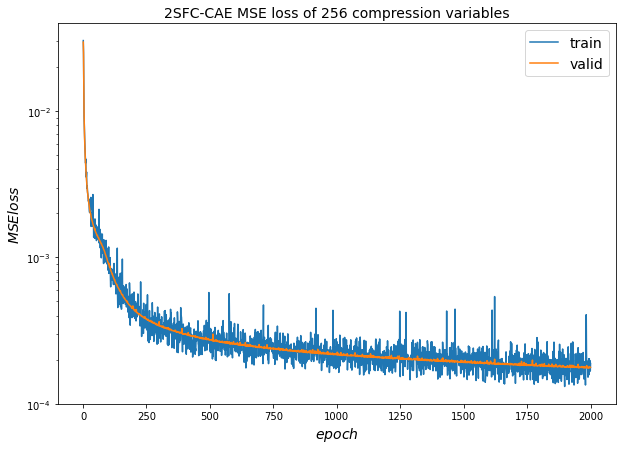

In [ ]:
pathName = "./2SFC_CAE/csv/II_Eran2000_LV256_B16_n1600_L0.0001.csv"
name = "2SFC-CAE MSE loss of 256 compression variables"
PlotMSELoss(pathName,name)

In [ ]:
autoencoder = torch.load("./2SFC_CAE/pkl/II_Eran2000_LV256_B16_n1600_L0.0001.pkl")

## MSE

In [ ]:
# pass training, validation and test data through the autoencoder
# Due to the limit of the GPU, we must get the MSE result respectively
t_predict_0 = time.time()
mode_1valid, valid_decoded = autoencoder.to(device)(torch.tensor(valid_data).to(device))
t_predict_1 = time.time()
error_autoencoder = (valid_decoded.cpu().detach().numpy() - valid_data[:, :, 3:5])
print("Mse_err of validation data", (error_autoencoder**2).mean())

t_predict_2 = time.time()
mode_1test, test_decoded = autoencoder.to(device)(torch.tensor(test_data).to(device))
t_predict_3 = time.time()
error_autoencoder = (test_decoded.cpu().detach().numpy() - test_data[:, :, 3:5])
print("Mse_err of test data", (error_autoencoder**2).mean())
# total_decoded = getTotal_decoded(training_decoded,valid_decoded,test_decoded,train_index,valid_index,test_index)
# error_autoencoder = (total_decoded - total_data[:, :, 3:5])
# print("Mse_err of total data", (error_autoencoder**2).mean())

# print(mode_1train.shape)
print(mode_1valid.shape)
print(mode_1test.shape)
print("Reconstruction:",t_predict_3-t_predict_2+t_predict_1-t_predict_0)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Mse_err of validation data 0.00017750181117022845
Mse_err of test data 0.00017469749533017667
torch.Size([200, 256])
torch.Size([200, 256])
Reconstruction: 2.810105085372925


In [ ]:
# Calculate the MSE of training data respectively
training_data1 = training_data[0:800,:,:]
print(training_data1.shape)
training_data2 = training_data[800:1600,:,:]
print(training_data2.shape)

(800, 20550, 5)
(800, 20550, 5)


In [ ]:
t_predict_4 = time.time()
mode_1train1, training_decoded1 = autoencoder.to(device)(torch.tensor(training_data1).to(device))
t_predict_5 = time.time()
error_autoencoder1 = (training_decoded1.cpu().detach().numpy() - training_data1[:, :, 3:5])
print("Mse_err of training1 data", (error_autoencoder1**2).mean())
print("Reconstruction:",t_predict_5-t_predict_4)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Mse_err of training1 data 0.00018556228235250727
Reconstruction: 4.9967942237854


In [ ]:
t_predict_6 = time.time()
mode_1train2, training_decoded2 = autoencoder.to(device)(torch.tensor(training_data2).to(device))
t_predict_7 = time.time()
error_autoencoder2 = (training_decoded2.cpu().detach().numpy() - training_data2[:, :, 3:5])
print("Mse_err of training2 data", (error_autoencoder2**2).mean())
print("Reconstruction:",t_predict_7 - t_predict_6)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Mse_err of training2 data 0.00017819601488501064
Reconstruction: 5.173910856246948


## Convert csv to vtu

In [ ]:
# Because we didn't convert 2SFC csv to vtu, so that we don't generate the total decoded.
# We just calculate the MSE of the 2SFC-CAE
# training_decoded[:, :, 0] = (training_decoded[:, :, 0] - bu)/ku
# valid_decoded[:, :, 0] = (valid_decoded[:, :, 0] - bu)/ku
# test_decoded[:, :, 0] = (test_decoded[:, :, 0] - bu)/ku
# total_decoded[:, :, 0] = (total_decoded[:, :, 0] - bu)/ku

# training_decoded[:, :, 1] = (training_decoded[:, :, 1] - bv)/kv
# valid_decoded[:, :, 1] = (valid_decoded[:, :, 1] - bv)/kv
# test_decoded[:, :, 1] = (test_decoded[:, :, 1] - bv)/kv
# total_decoded[:, :, 1] = (total_decoded[:, :, 1] - bv)/kv


# training_data[:, :, 3] = (training_data[:, :, 3] - bu)/ku
# valid_data[:, :, 3] = (valid_data[:, :, 3] - bu)/ku
# test_data[:, :, 3] = (test_data[:, :, 3] - bu)/ku
# total_data[:, :, 3] = (total_data[:, :, 3] - bu)/ku

# training_data[:, :, 4] = (training_data[:, :, 4] - bv)/kv
# valid_data[:, :, 4] = (valid_data[:, :, 4] - bv)/kv
# test_data[:, :, 4] = (test_data[:, :, 4] - bv)/kv
# total_data[:, :, 4] = (total_data[:, :, 4] - bv)/kv

In [ ]:
# results = np.concatenate((training_decoded.cpu().data.numpy(), valid_decoded.cpu().data.numpy(), test_decoded.cpu().data.numpy()))
# ##results = np.concat(training_data, valid_data)
# print('results shape', results.shape)
# N = results.shape[1] * results.shape[2]
# results = results.reshape((results.shape[0],N), order='F')
# print('results shape', results.shape, type(results))
# path = "./SFC_CAE/All_results/SII"+"_LV"+str(Latent_num) + "_B"+str(BATCH_SIZE)+'E_'+str(2000)+"_result.csv"
# ## write results to file
# np.savetxt(path, results , delimiter=',')

results shape (1000, 20550, 2)
results shape (1000, 41100) <class 'numpy.ndarray'>
